In [59]:
# We can see from the first research question that the biggest polluters are:
#1. China
#2. US
#3. Russia
#4. Japan
#5. Germany
#6. India
#7. UK
#8. Saudi Arabia
#9. Iran
#10. France

# LOADING THE DATASET
import pandas as pd

df = pd.read_csv("data/CFU.csv" )

In [60]:
df.head()

,Country,Contributor,Fund,Fund focus,Measure Names,Measure Values
0,Australia,Australia,Clean Technology Fund (CTF),Mitigation - General,Deposited (USD million current),86.33
1,Australia,Australia,Clean Technology Fund (CTF),Mitigation - General,Pledged (USD million current),86.33
2,Australia,Australia,Forest Carbon Partnership Facility - Carbon Fu...,Mitigation - REDD,Deposited (USD million current),18.39
3,Australia,Australia,Forest Carbon Partnership Facility - Carbon Fu...,Mitigation - REDD,Pledged (USD million current),18.39
4,Australia,Australia,Forest Carbon Partnership Facility - Readiness...,Mitigation - REDD,Deposited (USD million current),23.89


In [61]:
vulnerable_countries = ["China", "United States", "Russian Federation", "Japan", "Germany", "India", "United Kingdom", "Saudi Arabia", "Iran", "France"]
vulnerable_data = df[df['Country'].isin(vulnerable_countries)]

# CHECK FOR MISSING VALUES 
missing_values = vulnerable_data.isnull().sum()
missing_values

Country           0
Contributor       0
Fund              0
Fund focus        0
Measure Names     0
Measure Values    5
dtype: int64

In [62]:
rows_with_missing = vulnerable_data[vulnerable_data.isnull().any(axis=1)]
rows_with_missing

,Country,Contributor,Fund,Fund focus,Measure Names,Measure Values
314,France,France,Green Climate Fund (GCF-2),Multiple Foci,Deposited (USD million current),NaN
352,Germany,Germany,Green Climate Fund (GCF-2),Multiple Foci,Deposited (USD million current),NaN
492,Japan,Japan,Green Climate Fund (GCF-2),Multiple Foci,Deposited (USD million current),NaN
940,United Kingdom,United Kingdom,Green Climate Fund (GCF-2),Multiple Foci,Deposited (USD million current),NaN
982,United States,United States,Green Climate Fund (GCF-2),Multiple Foci,Deposited (USD million current),NaN


In [63]:
# Remove all types of funds that are not related to mitigation
mitigation_data = vulnerable_data[vulnerable_data['Fund focus'].str.contains("Mitigation", case=False, na=False)]

In [64]:
# Grouping data by country, type of aid, and type of funds.
grouped = mitigation_data.groupby(['Country', 'Fund focus', 'Measure Names'])['Measure Values'].sum().unstack()

# Adding the percentage of contributed funds.
grouped['Fulfillment (%)'] = (grouped['Deposited (USD million current)'] / grouped['Pledged (USD million current)']) * 100
grouped

Measure Names                        Deposited (USD million current)  \
Country        Fund focus                                              
France         Mitigation - General                         215.3600   
               Mitigation - REDD                             35.0900   
Germany        Mitigation - General                        1036.8700   
               Mitigation - REDD                            823.9800   
Japan          Mitigation - General                        1103.4000   
               Mitigation - REDD                             64.6100   
United Kingdom Mitigation - General                        2405.9900   
               Mitigation - REDD                            615.4225   
United States  Mitigation - General                        2500.3000   
               Mitigation - REDD                            238.8800   

Measure Names                        Pledged (USD million current)  \
Country        Fund focus                                            
France         Mitigation - General                         215.36   
               Mitigation - REDD                             35.09   
Germany        Mitigation - General                        1036.87   
               Mitigation - REDD                            851.85   
Japan          Mitigation - General                        1103.40   
               Mitigation - REDD                             64.61   
United Kingdom Mitigation - General                        2405.99   
               Mitigation - REDD                            774.05   
United States  Mitigation - General                        2500.30   
               Mitigation - REDD                            738.88   

Measure Names                        Fulfillment (%)  
Country        Fund focus                             
France         Mitigation - General       100.000000  
               Mitigation - REDD          100.000000  
Germany        Mitigation - General       100.000000  
               Mitigation - REDD           96.728297  
Japan          Mitigation - General       100.000000  
               Mitigation - REDD          100.000000  
United Kingdom Mitigation - General       100.000000  
               Mitigation - REDD           79.506815  
United States  Mitigation - General       100.000000  
               Mitigation - REDD           32.330013

In [38]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at d:\programs\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


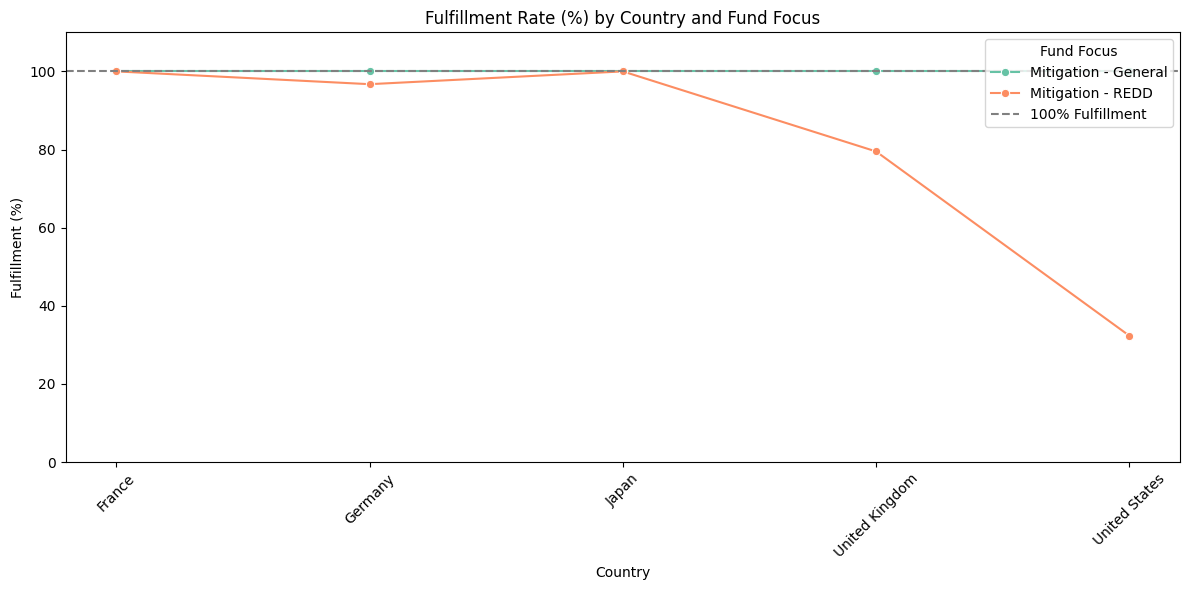

In [45]:
#1. Line Chart: Fulfillment (%) by Country and Fund Focus

import matplotlib.pyplot as plt
import seaborn as sns

# Line chart for fulfillment percentage
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_reset, x='Country', y='Fulfillment (%)', hue='Fund focus', marker='o', palette='Set2')

plt.title('Fulfillment Rate (%) by Country and Fund Focus')
plt.ylabel('Fulfillment (%)')
plt.ylim(0, 110)  # Set limits for clarity
plt.axhline(100, color='gray', linestyle='--', label='100% Fulfillment')  # Add a reference line at 100%
plt.xticks(rotation=45)
plt.legend(title='Fund Focus', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
# The results of the fulfillment of pledged funds reveal significant variations among countries and fund focuses:
# 1. High Fulfillment (100%): France, Germany, and Japan consistently met their pledged amounts for both Mitigation-General and Mitigation-REDD, demonstrating a strong commitment to delivering on their climate finance promises.
# 2. Moderate Fulfillment: The United Kingdom achieved 100% fulfillment for Mitigation-General but fell short for Mitigation-REDD, with a fulfillment rate of approximately 79.5%. This indicates some challenges in meeting commitments related to forest conservation efforts.
# 3. Low Fulfillment:The United States displayed a stark disparity. While Mitigation-General funds were fully delivered (100%), Mitigation-REDD funds showed only a 32.3% fulfillment rate. This indicates significant underperformance in supporting forest-related mitigation efforts.

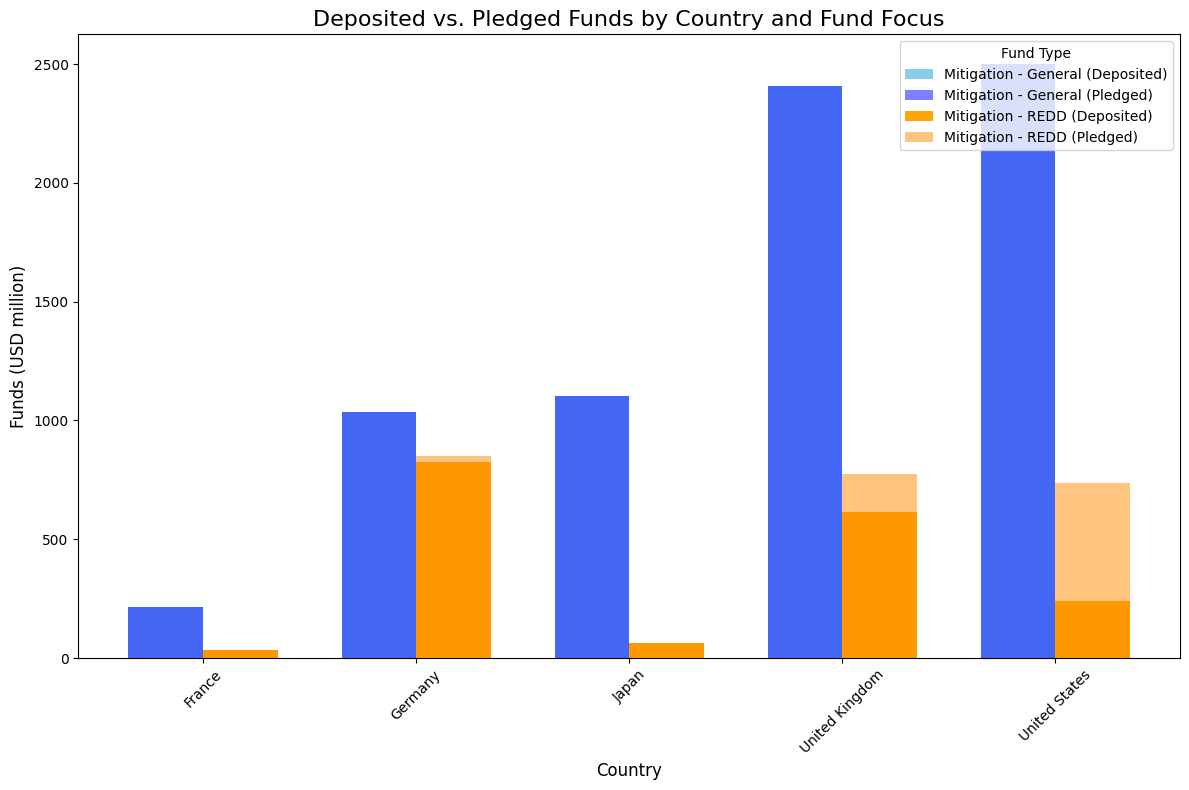

In [67]:
#2. 

# Reset the index for easier plotting
grouped_reset = grouped.reset_index()
# Preparing the data for the grouped bar chart
grouped_data = grouped_reset[grouped_reset['Fund focus'].isin(['Mitigation - General', 'Mitigation - REDD'])]

# Pivoting by 'Fund focus' for 'Deposited' and 'Pledged'
pivot_data = grouped_data.pivot(index='Country', columns='Fund focus', values=['Deposited (USD million current)', 'Pledged (USD million current)'])

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
positions = range(len(pivot_data))

# Bars for Mitigation - General
ax.bar(
    [p - bar_width / 2 for p in positions],
    pivot_data[('Deposited (USD million current)', 'Mitigation - General')],
    bar_width,
    label='Mitigation - General (Deposited)',
    color='skyblue'
)
ax.bar(
    [p - bar_width / 2 for p in positions],
    pivot_data[('Pledged (USD million current)', 'Mitigation - General')],
    bar_width,
    label='Mitigation - General (Pledged)',
    color='blue',
    alpha=0.5
)

# Bars for Mitigation - REDD
ax.bar(
    [p + bar_width / 2 for p in positions],
    pivot_data[('Deposited (USD million current)', 'Mitigation - REDD')],
    bar_width,
    label='Mitigation - REDD (Deposited)',
    color='orange'
)
ax.bar(
    [p + bar_width / 2 for p in positions],
    pivot_data[('Pledged (USD million current)', 'Mitigation - REDD')],
    bar_width,
    label='Mitigation - REDD (Pledged)',
    color='darkorange',
    alpha=0.5
)

# Customizing
ax.set_xticks(positions)
ax.set_xticklabels(pivot_data.index, rotation=45)
ax.set_title('Deposited vs. Pledged Funds by Country and Fund Focus', fontsize=16)
ax.set_ylabel('Funds (USD million)', fontsize=12)
ax.set_xlabel('Country', fontsize=12)
ax.legend(loc='upper right', fontsize=10, title='Fund Type')

plt.tight_layout()
plt.show()

In [51]:
# CHINA AND RUSSIAN FEDERATION
china_and_russia_data = df[(df['Country'] == 'China') | (df['Country'] == 'Russian Federation')]
china_and_russia_data

,Country,Contributor,Fund,Fund focus,Measure Names,Measure Values
150,China,China,Global Environment Facility (GEF4),Multiple Foci,Deposited (USD million current),3.440000
151,China,China,Global Environment Facility (GEF4),Multiple Foci,Pledged (USD million current),3.440000
152,China,China,Global Environment Facility (GEF5),Multiple Foci,Deposited (USD million current),4.830000
153,China,China,Global Environment Facility (GEF5),Multiple Foci,Pledged (USD million current),4.830000
154,China,China,Global Environment Facility (GEF6),Multiple Foci,Deposited (USD million current),6.800000
155,China,China,Global Environment Facility (GEF6),Multiple Foci,Pledged (USD million current),6.800000
156,China,China,Global Environment Facility (GEF7),Multiple Foci,Deposited (USD million current),4.330000
157,China,China,Global Environment Facility (GEF7),Multiple Foci,Pledged (USD million current),4.330000
158,China,China,Global Environment Facility (GEF8),Multiple Foci,Deposited (USD million current),5.100000
159,China,China,Global Environment Facility (GEF8),Multiple Foci,Pledged (USD million current),5.100000


In [52]:
# Grouping china_and_russia_data by country, type of aid, and type of funds.
grouped = china_and_russia_data.groupby(['Country', 'Fund focus', 'Measure Names'])['Measure Values'].sum().unstack()

# Adding the percentage of contributed funds.
grouped['Fulfillment (%)'] = (grouped['Deposited (USD million current)'] / grouped['Pledged (USD million current)']) * 100
grouped

,Measure Names,Deposited (USD million current),Pledged (USD million current),Fulfillment (%)
Country,Fund focus,,,
China,Multiple Foci,24.50,24.500000,100.000000
Russian Federation,Multiple Foci,17.15,21.809534,78.635335


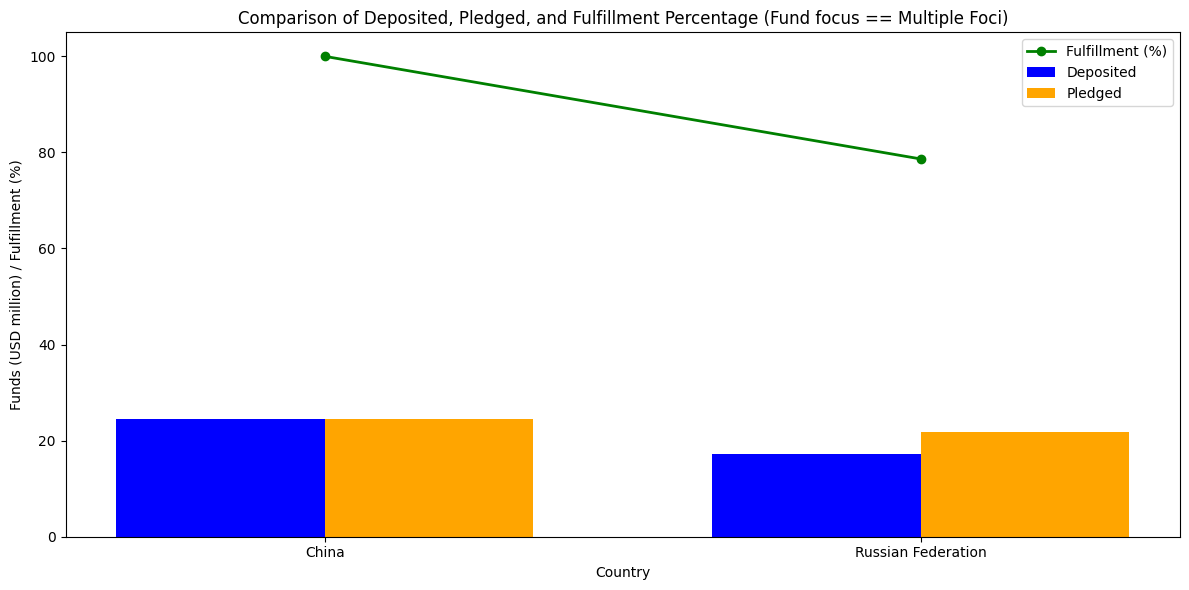

In [55]:
# Data for the chart
data = {
    'Country': ['China', 'Russian Federation'],
    'Deposited': [24.50, 17.15],
    'Pledged': [24.50, 21.81],
    'Fulfillment (%)': [100.0, 78.64],
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Bar width for the grouped bar chart
bar_width = 0.35
x = range(len(df['Country']))

# Deposited and Pledged bars
plt.bar(x, df['Deposited'], width=bar_width, color='blue', label='Deposited')
plt.bar([i + bar_width for i in x], df['Pledged'], width=bar_width, color='orange', label='Pledged')

# Fulfillment percentage as a line with markers
plt.plot([i + bar_width / 2 for i in x], df['Fulfillment (%)'], color='green', marker='o', label='Fulfillment (%)', linewidth=2)

# Adding labels and title
plt.xticks([i + bar_width / 2 for i in x], df['Country'])
plt.xlabel('Country')
plt.ylabel('Funds (USD million) / Fulfillment (%)')
plt.title('Comparison of Deposited, Pledged, and Fulfillment Percentage (Fund focus == Multiple Foci)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#China has a 100% fulfillment rate, meaning all pledged funds have been deposited.
#The Russian Federation has a lower fulfillment rate (78.64%), indicating that not all pledged funds have been deposited.
#China pledged and deposited slightly more than the Russian Federation (24.5M USD vs. 21.81M USD pledged).